# MMSB: Data Generation

In [1]:
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mmsb
import utils

%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.debugger import Tracer
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [26]:
def gen_data(B, V, N, alpha=0.1):
    assert B.shape[0] == B.shape[1]
    K = B.shape[0]
    alpha_vec = [alpha for _ in xrange(K)]
    
    pi = np.zeros((V, K))
    X = np.zeros((N, 3), dtype=int)
    for p in xrange(V):
        pi[p] = np.random.dirichlet(alpha_vec)
    
    for n in xrange(N):
        p = q = np.random.randint(V)
        while p == q:
            q = np.random.randint(V)
        
        p, q = sorted([p, q])
        g = np.random.choice(range(K), p=pi[p])
        h = np.random.choice(range(K), p=pi[q])
#         y = np.random.binomial(1, p=B[g,h])
        y = np.random.binomial(1, p=0.5)
        X[n,:] = np.array([p,q,y])
        
    return X, pi

In [40]:
def get_interactions(X, V):
    I = np.zeros((V, V), dtype=int)
    for p, q, v in X:
        if v:
            I[p,q] += 1
        else:
            I[q,p] += 1

    for p in xrange(V):
        for q in xrange(p):
            if I[p,q] > I[q,p]:
                I[p,q] = 1
                I[q,p] = 0
            elif I[p,q] < I[q,p]:
                I[p,q] = 0
                I[q,p] = 1
            else: I[q,p] = I[p,q] = 0.5
    return I

In [27]:
K = 3
V = 100
N = 1000
B_ = utils.make_B(K, probs=[0.1])
X, pi = gen_data(B_, V, N, alpha=0.1)

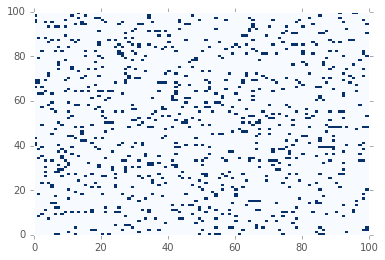

In [41]:
I = pd.DataFrame(get_interactions(X, V))
plt.pcolor(I, cmap='Blues')

In [39]:
get_interactions(X, V)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 2],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

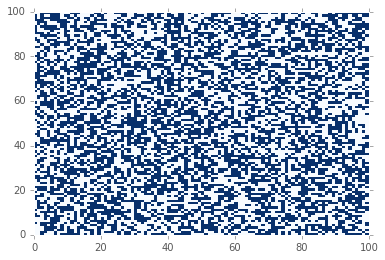

In [30]:
plt.pcolor(np.round(np.random.random((100,100))), cmap='Blues')

In [ ]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

## Pi (prototype distributions)

In [ ]:
pd.DataFrame(pi).T.plot(kind='bar', cmap='Accent', figsize=[14,4])

In [ ]:
pd.DataFrame(gamma).plot(kind='bar', cmap='Accent', figsize=[14,4])

### B (interaction probabilities)

In [ ]:
pd.DataFrame(B).round(6)

## Simulation II: Medium graph

In [ ]:
K = 4
V = 100
N = 10000
B_ = utils.make_B(K, probs=[.1])
X, pi = utils.gen_data(B_, V, N, alpha=0.05)

In [ ]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### Interaction matrix

In [ ]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax()
plt.pcolor(I.ix[ptypes.sort_values().index], cmap='Blues')

## Simulation III: Large graph

In [ ]:
K = 10
V = 300
N = 10000
B_ = utils.make_B(K, probs=[.1])
X, pi = utils.gen_data(B_, V, N, alpha=0.05)

In [ ]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### Interaction matrix

In [ ]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax()
plt.pcolor(I.ix[ptypes.sort_values().index], cmap='Blues')

In [ ]:
plt.pcolor(I.ix[np.random.permutation(I.index)], cmap='Blues')

In [ ]:
plt.pcolor(I, cmap='Blues')